In [43]:
    import pandas as pd
    import numpy as np
    import matplotlib.pylab as plt
    import matplotlib.ticker as ticker
    import random
    from sklearn.linear_model import LinearRegression
    from random import seed, gauss, random
    from matplotlib import pyplot
    import seaborn as sns
    import csv
    from scipy import stats
    import warnings
    import itertools
    import statsmodels.api as sm
    import statsmodels.tsa.api as smt
    import statsmodels.formula.api as smf
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    from io import StringIO
    import requests
    import calendar
    import sys
    from math import sqrt
    plt.style.use('bmh')
    %matplotlib inline

In [2]:
df = pd.read_csv('MCI_2014_to_2019.csv',sep=',') 
df = df.drop(df[df['occurrenceyear'] < 2014].index)
df = df.iloc[:,[16,17,18,19,22]]
df.head()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,MCI
0,2015.0,December,18.0,352.0,Assault
1,2015.0,August,15.0,227.0,Assault
2,2015.0,August,16.0,228.0,Break and Enter
3,2015.0,November,26.0,330.0,Break and Enter
4,2015.0,December,18.0,352.0,Assault


In [3]:
df['MCI'].value_counts()

Assault            110659
Break and Enter     43215
Auto Theft          23333
Robbery             21502
Theft Over           6671
Name: MCI, dtype: int64

In [4]:
df['month'] = pd.to_datetime(df.occurrencemonth, format='%B').dt.month

df.head()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,MCI,month
0,2015.0,December,18.0,352.0,Assault,12.0
1,2015.0,August,15.0,227.0,Assault,8.0
2,2015.0,August,16.0,228.0,Break and Enter,8.0
3,2015.0,November,26.0,330.0,Break and Enter,11.0
4,2015.0,December,18.0,352.0,Assault,12.0


In [5]:
df=df.rename(columns = {'occurrenceyear':'year'})
df=df.rename(columns = {'occurrenceday':'day'})

df.head()

,year,occurrencemonth,day,occurrencedayofyear,MCI,month
0,2015.0,December,18.0,352.0,Assault,12.0
1,2015.0,August,15.0,227.0,Assault,8.0
2,2015.0,August,16.0,228.0,Break and Enter,8.0
3,2015.0,November,26.0,330.0,Break and Enter,11.0
4,2015.0,December,18.0,352.0,Assault,12.0


In [6]:
df['Date'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))

In [7]:
df.drop(df.columns[0:4], axis=1, inplace=True)
df.drop(df.columns[1], axis=1, inplace=True)


In [8]:
df.head()


,MCI,Date
0,Assault,2015-12-01
1,Assault,2015-08-01
2,Break and Enter,2015-08-01
3,Break and Enter,2015-11-01
4,Assault,2015-12-01


In [9]:
#frequency counts
df = df.groupby('Date')['MCI'].value_counts().reset_index(name='FC')

In [10]:
FC_MCI = df.groupby(['Date'], as_index=False)['FC'].sum()

In [11]:
dates = pd.date_range(start='2014-01-01', freq='MS', periods=len(FC_MCI))

FC_MCI.set_index(dates, inplace=True)

In [12]:
MCI = FC_MCI
MCI.head()
MCI_total = MCI['FC']

In [13]:
MCI_total.head()

2014-01-01    2448
2014-02-01    2203
2014-03-01    2420
2014-04-01    2509
2014-05-01    2856
Freq: MS, Name: FC, dtype: int64

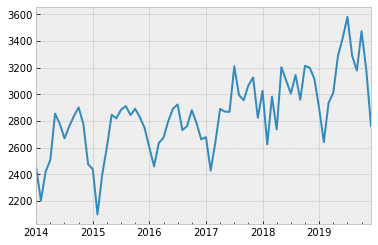

In [14]:
MCI_total.plot()

In [15]:
MCI_diff=MCI_total.diff(periods=1)
MCI_diff

2014-01-01      NaN
2014-02-01   -245.0
2014-03-01    217.0
2014-04-01     89.0
2014-05-01    347.0
              ...  
2019-08-01   -293.0
2019-09-01   -111.0
2019-10-01    295.0
2019-11-01   -290.0
2019-12-01   -420.0
Freq: MS, Name: FC, Length: 72, dtype: float64

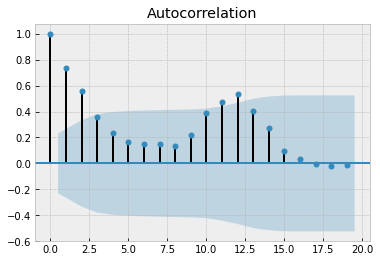

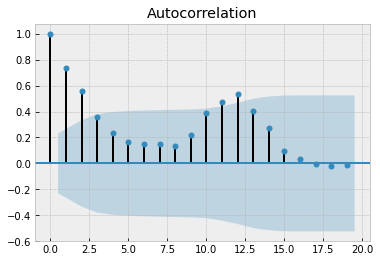

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(MCI_total)

In [17]:
MCI_diff.shift(1).head()

2014-01-01      NaN
2014-02-01      NaN
2014-03-01   -245.0
2014-04-01    217.0
2014-05-01     89.0
Freq: MS, Name: FC, dtype: float64

In [18]:
MCI_diff = MCI_diff[1:]
MCI_diff.head()

2014-02-01   -245.0
2014-03-01    217.0
2014-04-01     89.0
2014-05-01    347.0
2014-06-01    -77.0
Freq: MS, Name: FC, dtype: float64

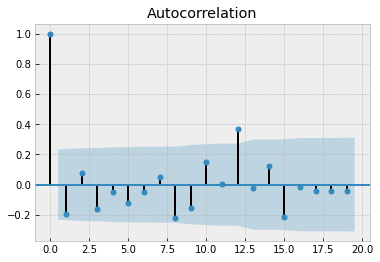

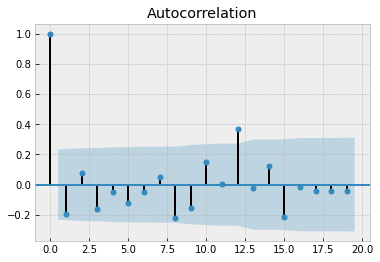

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(MCI_diff)

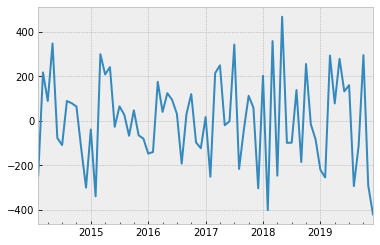

In [20]:
MCI_diff.plot()

In [27]:
X = MCI_total.values
train = X[0:63] # 63 data as train data
test = X[63:]  # 9 data as test data
predictions = []

In [28]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [29]:
predictions = model_ar_fit.predict(start=63,end=72)

In [30]:
test

array([3013, 3291, 3423, 3583, 3290, 3179, 3474, 3184, 2764], dtype=int64)

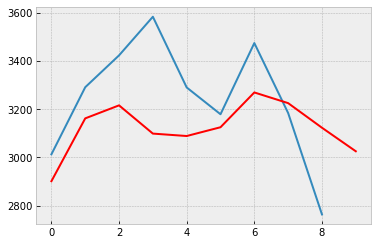

In [31]:
plt.plot(test)
plt.plot(predictions,color='red')

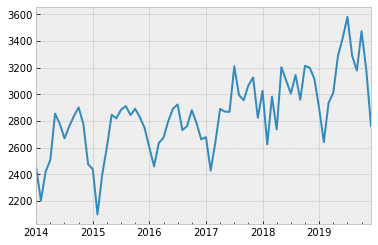

In [32]:
MCI_total.plot()

In [33]:
#AS we comparing both the graphs we can see red line has more differnces then blue one.

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [65]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(8, 2, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

807.7924018582835


In [66]:
predictions= model_arima_fit.forecast(steps=9)[0]
predictions

array([2922.47610538, 3213.85256408, 3135.75175942, 3130.03979909,
       3052.61523416, 3153.09604798, 3249.83138937, 3174.38678811,
       3114.70875311])

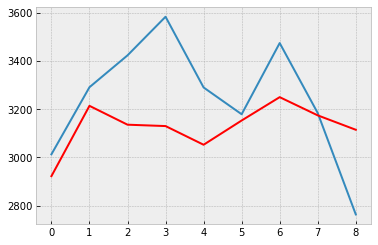

In [67]:
plt.plot(test)
plt.plot(predictions,color='red')

In [68]:
mean_squared_error(test,predictions)

59132.66097947338

In [69]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [70]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 873.0837731126617
(0, 0, 1) 853.343760302261
(0, 0, 2) 839.5320757229066
(0, 0, 3) 835.5648730821738
(0, 0, 4) 835.5932075113153
(0, 1, 0) 831.6013558778436
(0, 1, 1) 828.7822118244909
(0, 1, 2) 830.6689095315575
(0, 1, 3) 818.6522756322336
(0, 1, 4) 818.9273591710538
(0, 2, 0) 875.2149594801014
(0, 2, 1) 825.3139223603957
(0, 2, 2) 822.9798441474261
(0, 2, 3) 824.6617861698771
(0, 2, 4) 816.7713870026955
(1, 0, 0) 836.8440114803753
(1, 0, 1) 838.1184480629797
(1, 0, 2) 835.5082821984087
(1, 0, 3) 843.5318994503111
(1, 0, 4) 839.5744888284232
(1, 1, 0) 828.0889891590873
(1, 1, 1) 829.1727328003847
(1, 1, 2) 831.163774812187
(1, 1, 3) 819.6294654499948
(1, 1, 4) 820.9179381359606
(1, 2, 0) 841.5392365542632
(1, 2, 1) 822.1864544473044
(1, 2, 2) 823.1779979171329
(2, 0, 0) 837.5947643562413
(2, 0, 1) 837.899016375907
(2, 0, 2) 836.196359283118
(2, 0, 3) 837.1472962790143
(2, 0, 4) 836.1185603702653
(2, 1, 0) 829.5458216543211
(2, 1, 1) 822.7904893120755
(2, 1, 2) 823.1410002419